In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

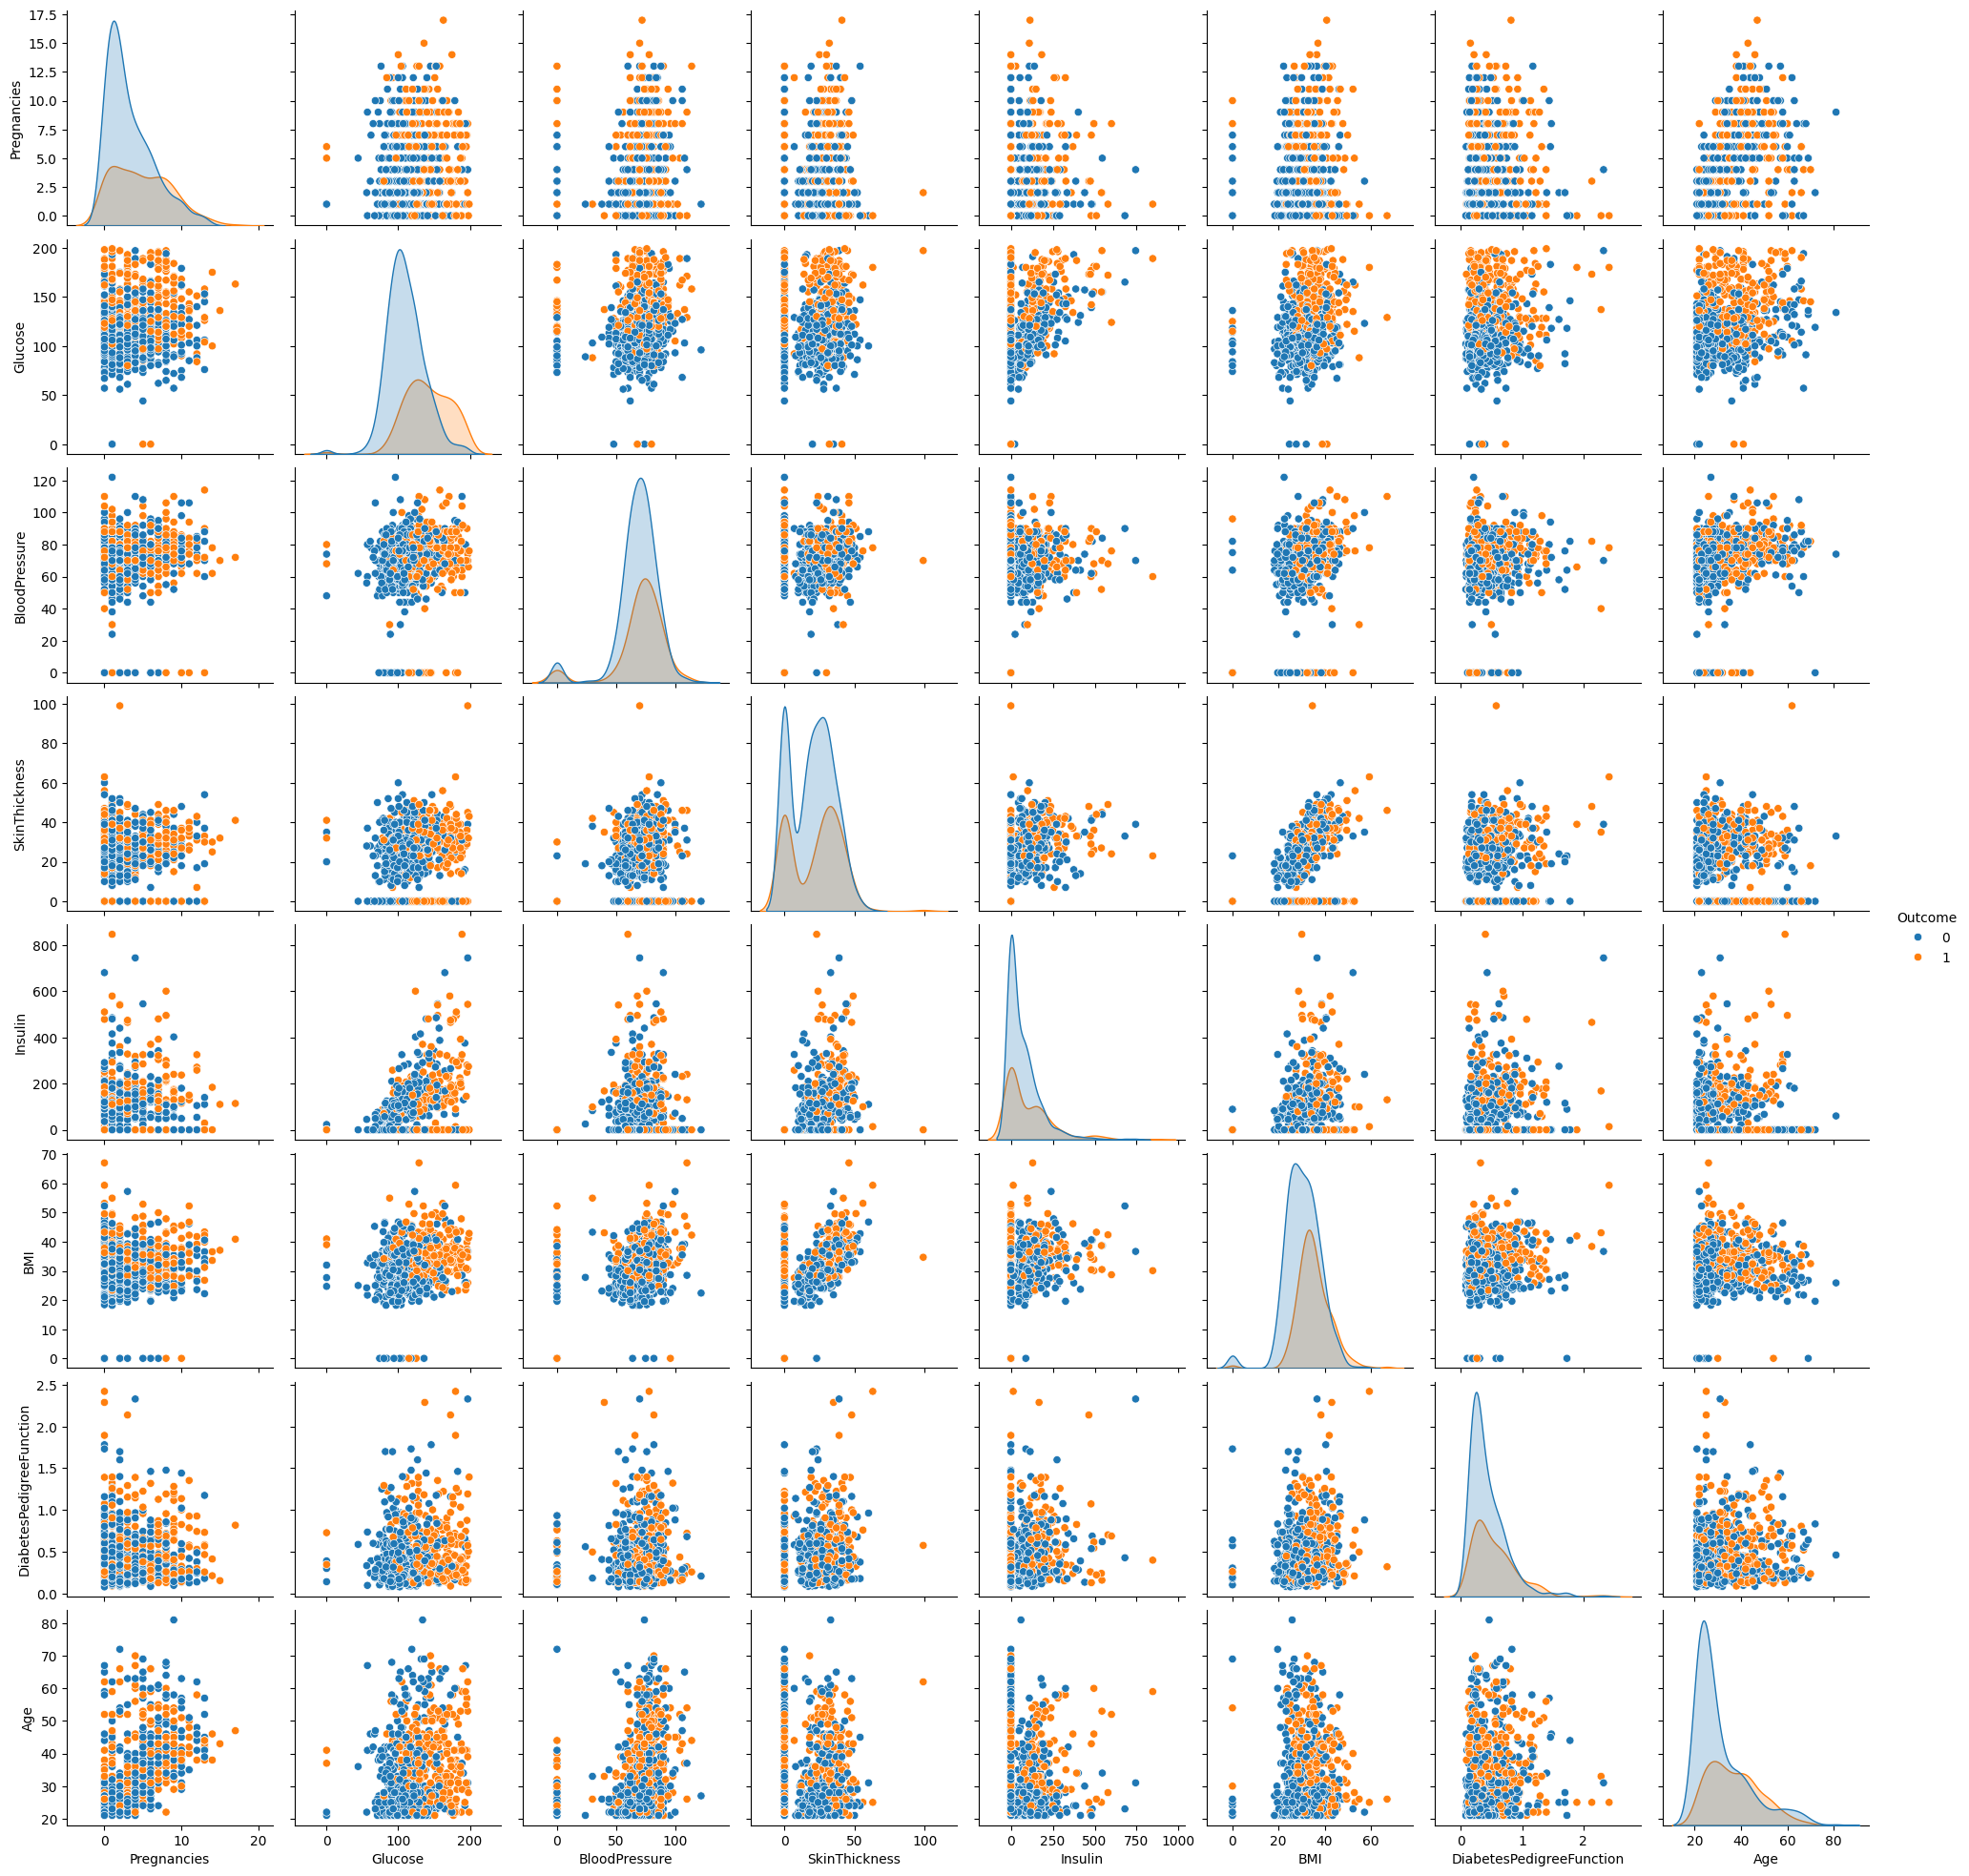

In [10]:
import seaborn as sns
sns.pairplot(df, hue="Outcome")

In [9]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
import numpy as np
df['choco']=np.where(df['Outcome']==1, 'Diabetic', 'Non Diabetic')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,choco
0,6,148,72,35,0,33.6,0.627,50,1,Diabetic
1,1,85,66,29,0,26.6,0.351,31,0,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,1,Diabetic
3,1,89,66,23,94,28.1,0.167,21,0,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,1,Diabetic


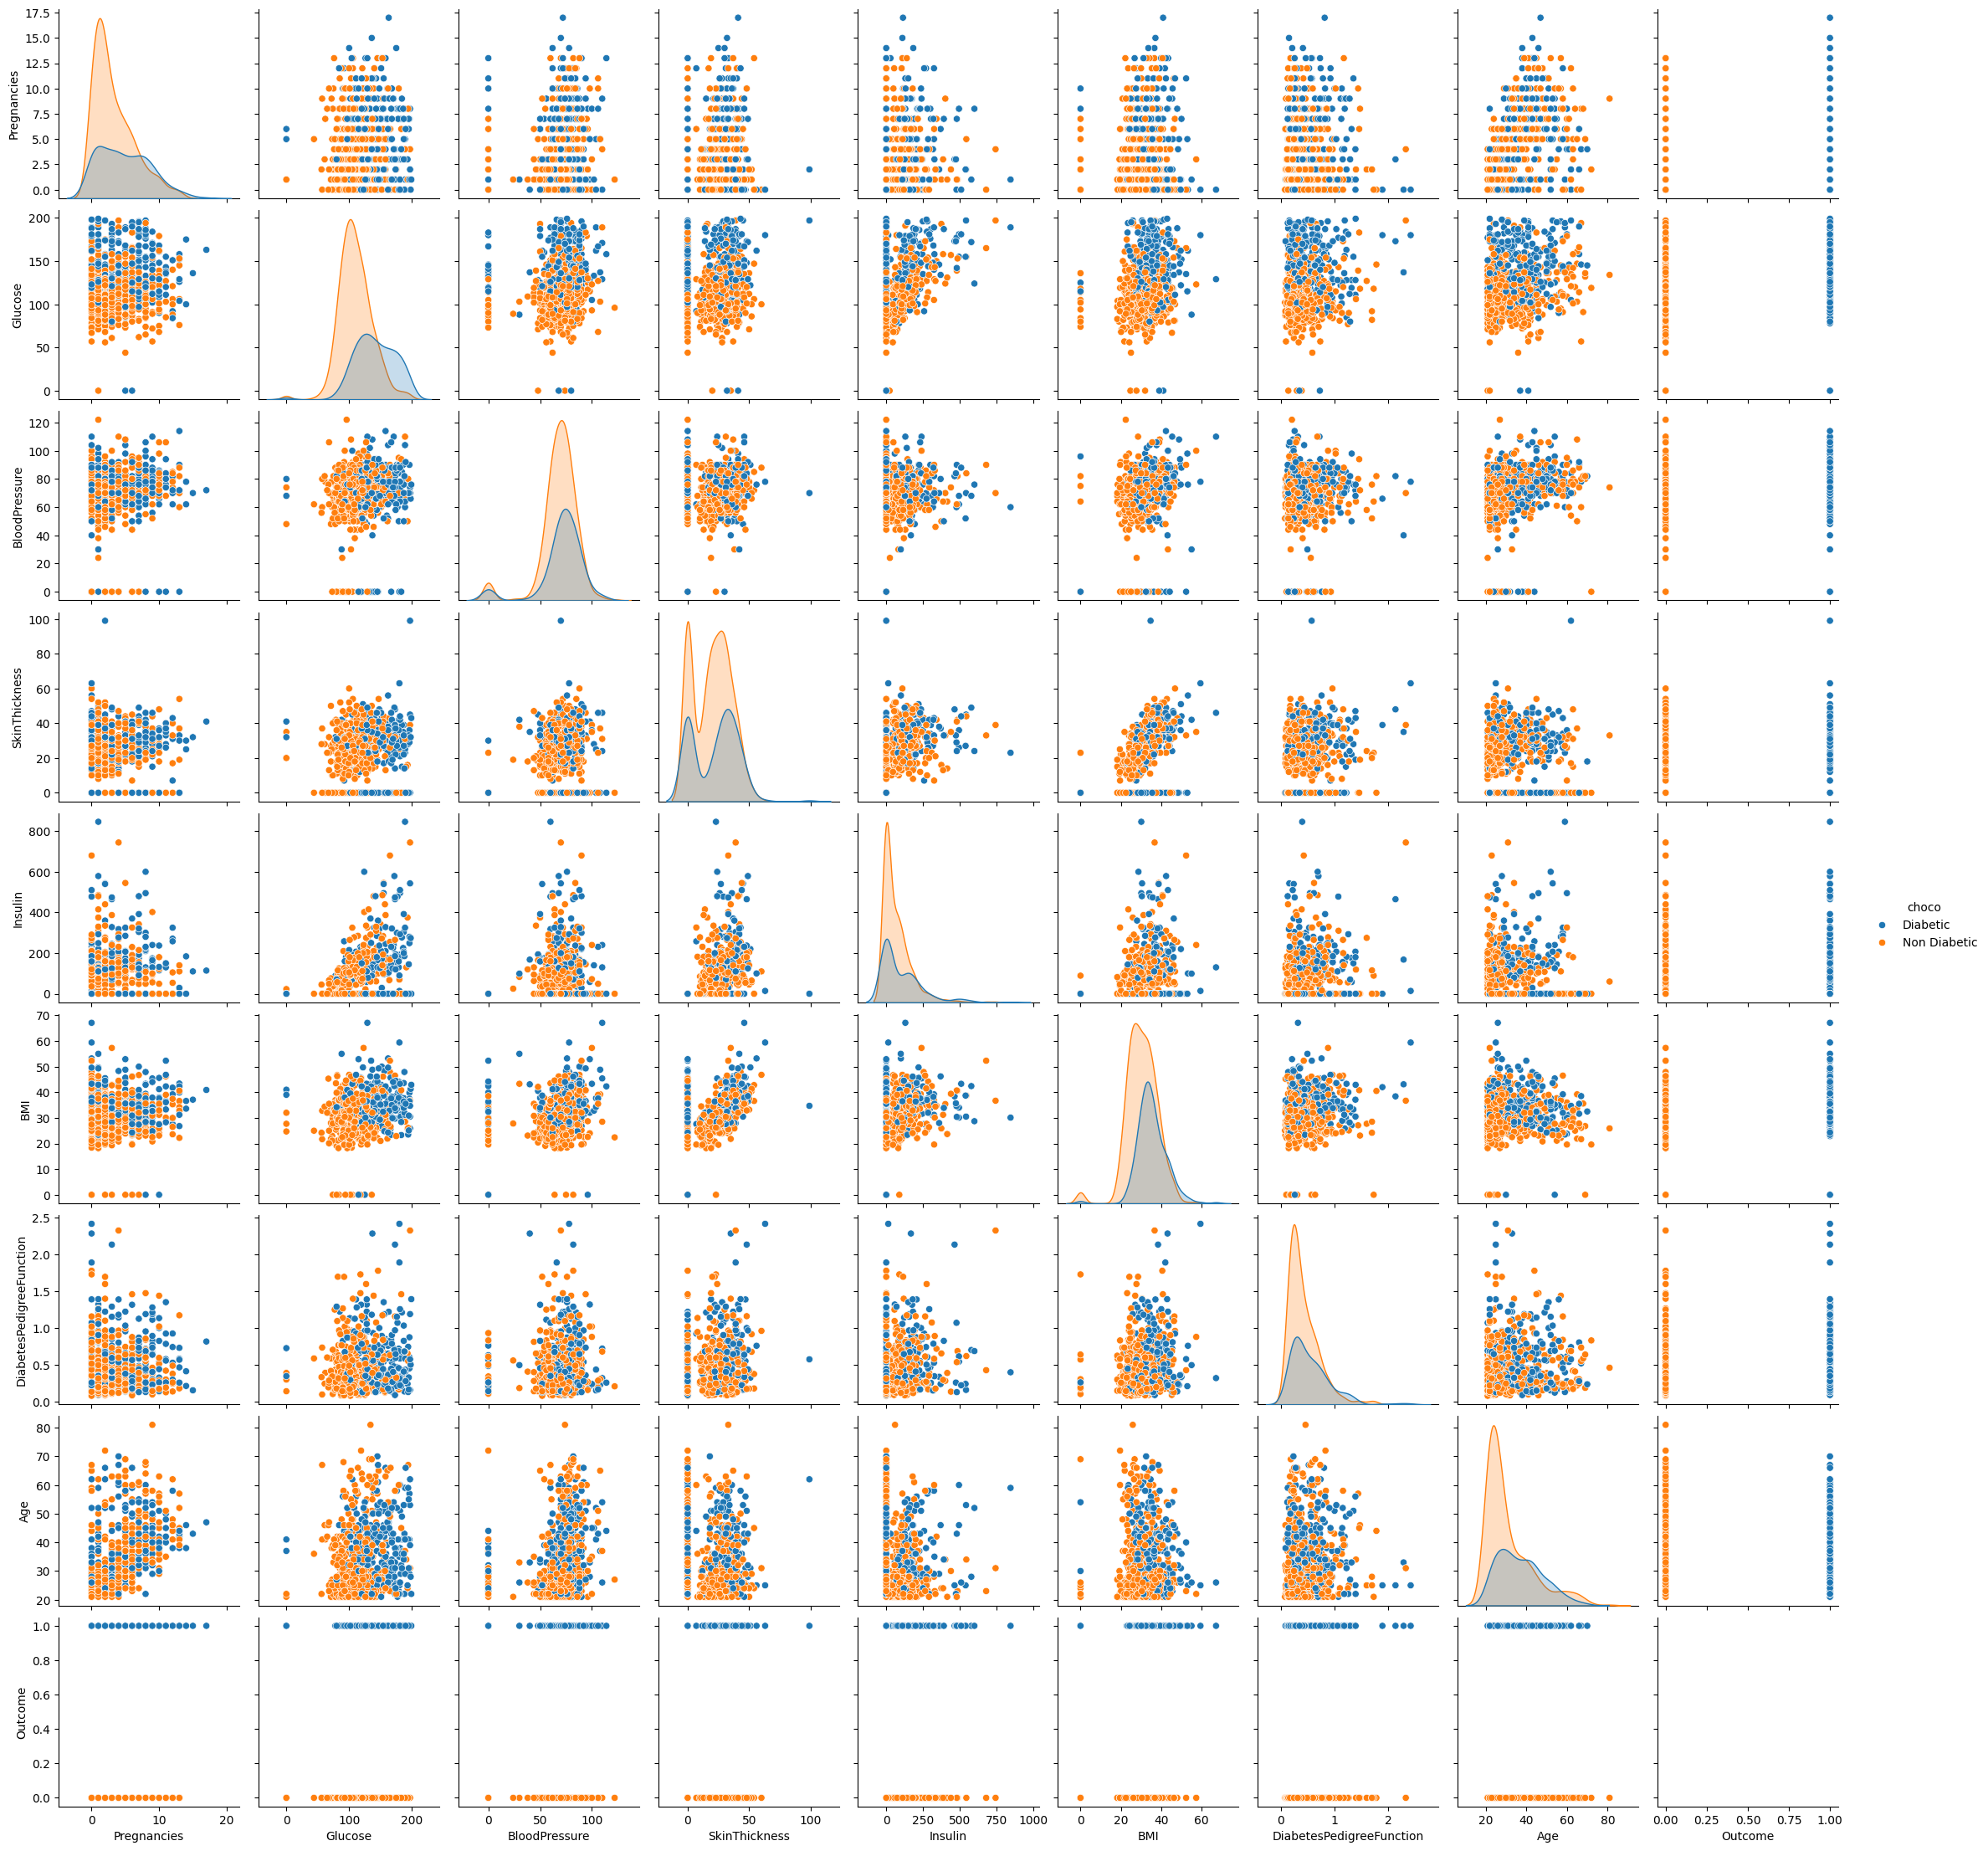

In [12]:
sns.pairplot(df, hue="choco")

In [19]:
X = df.drop(['Outcome', 'choco'],axis=1).values
# X = df.drop(('choco'), axis = 1).values
y = df['Outcome'].values
print(X)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
##lib from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [22]:
###Creating tensors for our data and this is how it works
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test= torch.LongTensor(y_test)

In [28]:
##creating Model from scrath
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out=nn.Linear(hidden2, out_features)
    def forward(self, x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [29]:
#initialize the ann model 
torch.manual_seed(20)
model = ANN_Model()

In [32]:
model.parameters()

<generator object Module.parameters at 0x000001F6052AFCA0>

In [33]:
###backward propogation, loss function, optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [34]:
epochs = 500
final_losses = []
for i in range(epochs):
    i = i+1
    y_pred = model.forward(X_train)
    loss = loss_func(y_pred, y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch numer: {} and the loss: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch numer: 1 and the loss: 3.485197067260742
Epoch numer: 11 and the loss: 0.8094318509101868
Epoch numer: 21 and the loss: 0.6039038300514221
Epoch numer: 31 and the loss: 0.5852952599525452
Epoch numer: 41 and the loss: 0.5642229914665222
Epoch numer: 51 and the loss: 0.5556882619857788
Epoch numer: 61 and the loss: 0.5464900732040405
Epoch numer: 71 and the loss: 0.5377224683761597
Epoch numer: 81 and the loss: 0.5299746990203857
Epoch numer: 91 and the loss: 0.5228621363639832
Epoch numer: 101 and the loss: 0.5166178345680237
Epoch numer: 111 and the loss: 0.5103716254234314
Epoch numer: 121 and the loss: 0.504956066608429
Epoch numer: 131 and the loss: 0.5001662373542786
Epoch numer: 141 and the loss: 0.4951781630516052
Epoch numer: 151 and the loss: 0.49088433384895325
Epoch numer: 161 and the loss: 0.4860341548919678
Epoch numer: 171 and the loss: 0.4803253710269928
Epoch numer: 181 and the loss: 0.4751473665237427
Epoch numer: 191 and the loss: 0.47063130140304565
Epoch numer

In [38]:
###plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

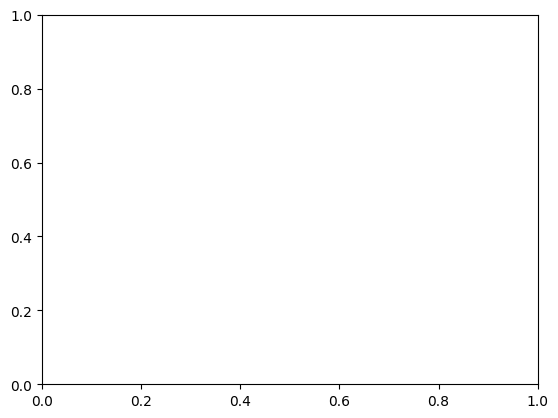

In [39]:
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [43]:
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
1
1
1
0
0
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
1
1
0
1
0
1
1
0
0
0
1
0
1
0
1
1
0
1
0
1
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
1
0
1
0
0
1
0
1
1
1
0
0
0
0
0
1
0
1
1
1
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
1
1
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
1
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
1
0
1
1
1
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
1
0
1
0
0
1
0
1
0
1
1
0
0
0
1
1
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
1


In [44]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1]

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[116,  41],
       [ 18,  56]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted values')

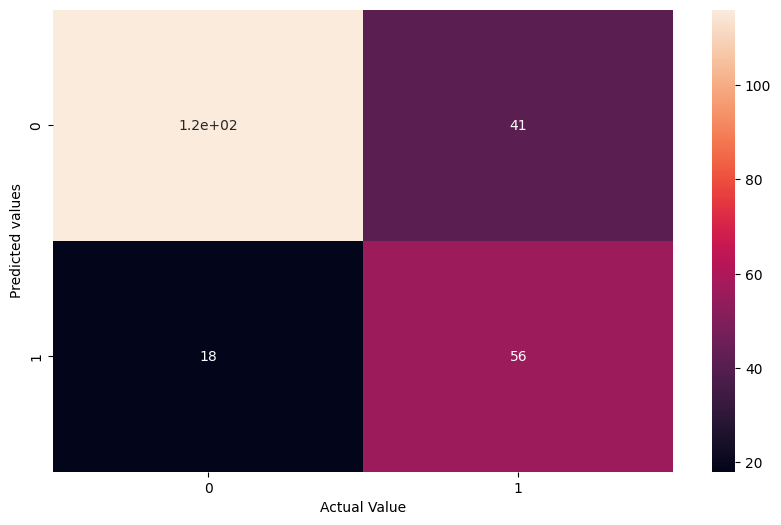

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted values')

In [50]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.7445887445887446

In [51]:
###save the model
torch.save(model, 'diabetes.pt')

In [52]:
model = torch.load('diabetes.pt')


C:\Users\Mehta\AppData\Local\Temp\ipykernel_19944\1065928060.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('diabetes.pt')


In [53]:
model

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [54]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [55]:
###save and load the model 
# torch.save(model.state_dict(), 'model_weights.pth')
list(df.iloc[0, :-1])
list

list

In [56]:
list1 = [6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [57]:
new_data = torch.tensor(list1)

In [58]:
new_data

tensor([  6.0000, 148.0000,  72.0000,  35.0000,   0.0000,  33.6000,   0.6270,
         50.0000])

In [59]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())
    

tensor([0.4665, 1.7120])
1
